# 1.Datset

### 1.1  목적
- 주어진 데이터셋을 통하여 다음 분기에 어떤 게임을 설계할 것인지 방향 제시


### 1.2 처리과정
####1.2.1 결측치
- 표기가 빠진 결측치는 약 400개로 전체의 2%정도로 제거해도 크게 영향을 미치지 않을 것으로 판단 → 삭제
- 판매량은 단위가 맞지 않아 K(1,000)를 기준으로 수정
- 연도는 한자리 두자리수가 표기된 것이 발견 
- 22 > X >= 0 2000년대로 예상이 가능함으로 20xx 수정
- 100 > X > 22 1900년대로 예상이 가능함으로 19xx 수정

####1.2.2 항목추가
- 지역별 판매량은 있지만 해당게임의 총출고량을 알 수 있는 항목이 없어서 추가

####1.2.3 이상치
-  최대값과 상한값의 확연한 차이, 따라서 데이터의 표준화를 통해 경계값 너머의 수치는 상한값과 하한값에 맞추어 조정













In [2]:
import pandas as pd
import numpy as np
import datetime
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, Normalizer
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [3]:
from google.colab import data_table

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
url = '/content/drive/MyDrive/sample/vgames2.csv'
df = pd.read_csv(url, index_col = 0) 
df.isnull().sum() #결측치가 약 400개 정도 된다. 약 2% 삭제해도 크게 영향을 끼치진 않을꺼 같다.
df = df.dropna()

In [7]:
#데이터 타입 변환
def tostr(string):
    return str(string.replace('K','000'))

df['NA_Sales'] = df['NA_Sales'].apply(tostr)
df['EU_Sales'] = df['EU_Sales'].apply(tostr)
df['JP_Sales'] = df['JP_Sales'].apply(tostr)
df['Other_Sales'] = df['Other_Sales'].apply(tostr)

def tostr2(string):
    return str(string.replace('M',''))

df['NA_Sales'] = df['NA_Sales'].apply(tostr2)
df['EU_Sales'] = df['EU_Sales'].apply(tostr2)
df['JP_Sales'] = df['JP_Sales'].apply(tostr2)
df['Other_Sales'] = df['Other_Sales'].apply(tostr2)

df['NA_Sales']=df['NA_Sales'].astype('float')
df['EU_Sales']=df['EU_Sales'].astype('float')
df['JP_Sales']=df['JP_Sales'].astype('float')
df['Other_Sales']=df['Other_Sales'].astype('float')

In [8]:
df1 = df

In [9]:
# 연도도 오류로 보이는 값들이 보여 수정
df1['Year'] = df1['Year'].astype(int)
df1['Year'] = df1['Year'].apply(lambda x: x+2000 if 22> x >=0 else x)
df1['Year'] = df1['Year'].apply(lambda x: x+1900 if 100> x >22 else x)
df2 = df1.reset_index(drop='True')

In [10]:
df3 = df2

In [11]:
df3['NA_Sales'] = df3['NA_Sales'].apply(lambda x: x/1000000 if x>=1000 else x)
df3['EU_Sales'] = df3['EU_Sales'].apply(lambda x: x/1000000 if x>=1000 else x)
df3['JP_Sales'] = df3['JP_Sales'].apply(lambda x: x/1000000 if x>=1000 else x)
df3['Other_Sales'] = df3['Other_Sales'].apply(lambda x: x/1000000 if x>=1000 else x)
# 단위,연도 맞추고 결측치 제거된 데이터셋

In [12]:
# 보기좋게 단위를 k로 맞춤
df3['NA_Sales'] = df3['NA_Sales'].apply(lambda x: x*1000)
df3['EU_Sales'] = df3['EU_Sales'].apply(lambda x: x*1000)
df3['JP_Sales'] = df3['JP_Sales'].apply(lambda x: x*1000)
df3['Other_Sales'] = df3['Other_Sales'].apply(lambda x: x*1000)
df4 = df3

In [14]:
# total이라는 항목추가
re = df4.iloc[:,[5,6,7,8]]
df4['total'] = re.sum(axis=1)
df4

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,40.0,0.0,0.0,0.0,40.0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,170.0,0.0,0.0,10.0,180.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.0,0.0,20.0,0.0,20.0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,40.0,0.0,0.0,0.0,40.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,120.0,90.0,0.0,40.0,250.0
...,...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,150.0,40.0,0.0,10.0,200.0
16237,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,10.0,0.0,0.0,0.0,10.0
16238,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,440.0,190.0,30.0,130.0,790.0
16239,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,50.0,50.0,250.0,30.0,380.0


# 2.지역별 분석
### 2.1 지역별 게임장르 선호도


In [15]:
# 1.지역에 따라서 선호하는 게임 장르가 다를까?
# 여기선 지역별 판매량을과 게임 장르를 보고 분석할수 있을꺼같다.
df_game_area = df4.iloc[:,[5,6,7,8]]
df_game_area.describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,16241.000000,16241.000000,16241.000000,16241.000000
mean,265.195493,147.378240,78.282741,48.234099
std,822.430729,508.339696,309.271989,189.677999
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,80.000000,20.000000,0.000000,10.000000
75%,240.000000,110.000000,40.000000,40.000000
max,41490.000000,29020.000000,10220.000000,10570.000000


In [16]:
stand = StandardScaler()
df_stand = stand.fit_transform(df_game_area)

df_scale = pd.DataFrame(df_stand, columns = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales'])

<function matplotlib.pyplot.show>

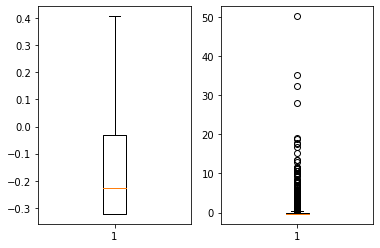

In [17]:
# 이상치를 조정 : 경계값 너머값들은 상한값, 하한값으로 치환
IQR = df_scale['NA_Sales'].quantile(0.75)-df_scale['NA_Sales'].quantile(0.25)
line_d = df_scale['NA_Sales'].quantile(0.25) - IQR*1.5
line_u = df_scale['NA_Sales'].quantile(0.75) + IQR*1.5

ww = df_scale['NA_Sales'].clip(line_d,line_u) #clip(x,y) x=최소값 아래값은 모두 x, y=최대값 초과값은 모두 y

fig, ax = plt.subplots(1,2)
ax[0].boxplot(ww)
ax[1].boxplot(df_scale['NA_Sales'])
plt.show

In [18]:
# 이상치 조정2
IQR2 = df_scale['EU_Sales'].quantile(0.75)-df_scale['EU_Sales'].quantile(0.25)
line_d2 = df_scale['EU_Sales'].quantile(0.25) - IQR2*1.5
line_u2 = df_scale['EU_Sales'].quantile(0.75) + IQR2*1.5
ww2 = df_scale['EU_Sales'].clip(line_d2,line_u2)

IQR3 = df_scale['JP_Sales'].quantile(0.75)-df_scale['JP_Sales'].quantile(0.25)
line_d3 = df_scale['JP_Sales'].quantile(0.25) - IQR2*1.5
line_u3 = df_scale['JP_Sales'].quantile(0.75) + IQR2*1.5
ww3 = df_scale['JP_Sales'].clip(line_d3,line_u3)

IQR4 = df_scale['Other_Sales'].quantile(0.75)-df_scale['Other_Sales'].quantile(0.25)
line_d4 = df_scale['Other_Sales'].quantile(0.25) - IQR2*1.5
line_u4 = df_scale['Other_Sales'].quantile(0.75) + IQR2*1.5
ww4 = df_scale['Other_Sales'].clip(line_d4,line_u4)

In [19]:
df_stand_fin = pd.concat([df2['Genre'],ww,ww2,ww3,ww4], axis=1)
df_stand_fin
tt = df_stand_fin.iloc[:,[1,2,3,4]]

In [21]:
# 정규화
normal = MinMaxScaler()
normal2 = normal.fit_transform(tt)

df_scale2 = pd.DataFrame(normal2, columns = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales'])

In [23]:
# 1.지역에 따라서 선호하는 게임 장르가 다를까?
# 여기선 지역별 판매량을과 게임 장르를 보고 분석할수 있을꺼같다.
df_area = pd.concat([df3['Genre'], df_scale2], axis=1,ignore_index=False)

#df_game_area.drop_duplicates(['Genre'])
# 장르가 무엇이 있는지 확인

In [24]:
# 지역, 장르별 데이터
df_sum = df_area.groupby(df_area['Genre']).sum()
df_sum

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,956.483333,983.618182,578.088730,913.959051
Adventure,135.616667,149.090909,253.782554,126.571213
Fighting,241.300000,229.454545,277.788331,217.320753
Misc,413.383333,372.963636,286.155475,374.162382
Platform,343.400000,314.581818,195.306605,262.695523
Puzzle,115.250000,98.818182,110.920389,83.172855
Racing,371.883333,410.672727,110.432599,354.117470
Role-Playing,304.183333,302.509091,693.417727,308.406944
Shooter,465.916667,496.909091,165.717242,445.424636


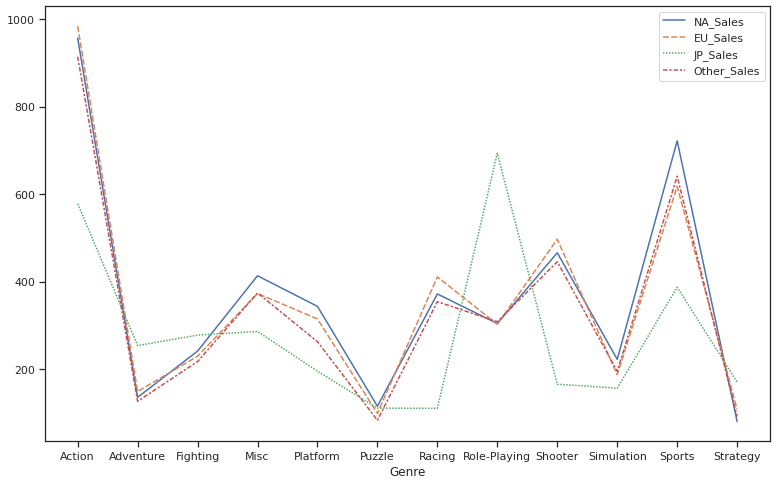

In [25]:
sns.set(rc = {'figure.figsize':(13,8)})
sns.set_style('ticks') 
sns.lineplot(data=df_sum)

plt.show()
# 그래프와 같이 일본뺴고는 지역별 게임장르가 영향을 끼치진 않는다.

In [26]:
df_sum.corr()
# 상관계수 > 0 이므로 양의관계에 잇다. 지역과는 상관이 없어보인다.(장르에 따라 판매량이 다르다는것을 유추)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
NA_Sales,1.000000,0.987345,0.528345,0.995006
EU_Sales,0.987345,1.000000,0.520952,0.993757
JP_Sales,0.528345,0.520952,1.000000,0.560863
Other_Sales,0.995006,0.993757,0.560863,1.000000


 
# 3.연도별 분석
### 3.1 연도별 게임트렌드


In [31]:
# 2.연도별 게임의 트렌드가 있을까
df_year2 = pd.concat([df4['Year'],df4['Genre'],df4['total']],axis=1)
df_year2 = df_year2.sort_values(by='Year' ,ascending=False)
# 스케일 x

In [32]:
# 연도가 너무많아 10년단위로 그룹하고 2020년뒤로는 년도가 적어 2010년부터 묶음
df_year2['Year'] = df_year2['Year'].apply(lambda x: 1 if 1990>x>=1980 else x)
df_year2['Year'] = df_year2['Year'].apply(lambda x: 2 if 2000>x>=1990 else x)
df_year2['Year'] = df_year2['Year'].apply(lambda x: 3 if 2010>x>=2000 else x)
df_year2['Year'] = df_year2['Year'].apply(lambda x: 4 if x>=2010 else x)
df_year2

,Year,Genre,total
6765,4,Simulation,290.0
9911,4,Role-Playing,30.0
5196,4,Action,10.0
14903,4,Role-Playing,10.0
3663,4,Misc,30.0
...,...,...,...
13958,1,Fighting,770.0
7171,1,Misc,230.0
9924,1,Misc,1050.0
5817,1,Misc,1150.0


## 3.2 연도별 게임트렌드
### 3.2.1 Gruop A

In [36]:
#1980~1989년
mask1 = (df_year2.Year == 1)
df_year_1 = df_year2.loc[mask1,:]
df_year_1 = df_year_1.groupby(['Genre']).sum().reset_index()
df_a = df_year_1.sort_values(by='total' ,ascending=False)

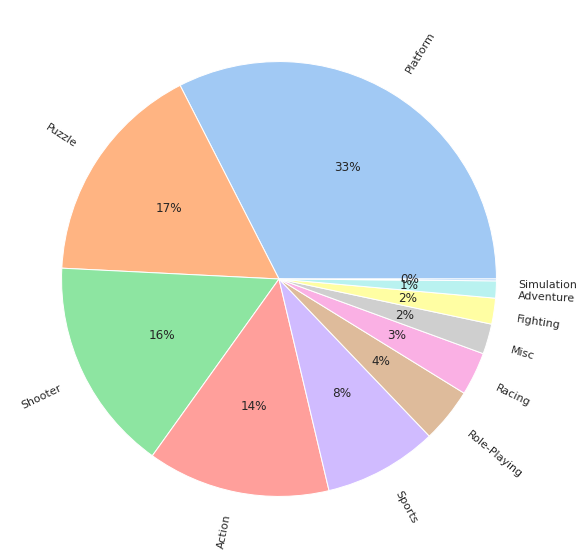

In [35]:
colors = sns.color_palette('pastel')

# create pie chart using matplotlib
plt.figure(figsize=(10,10)) 
plt.pie(df_a['total'], labels=df_a['Genre'], colors=colors,
        autopct='%.0f%%', rotatelabels='true')
plt.show()

In [37]:
mask2 = (df_year2.Year == 2)
df_b = df_year2.loc[mask2,:]
df_b = df_b.groupby(['Genre']).sum().reset_index()
df_b = df_b.sort_values(by='total' ,ascending=False)

mask3 = (df_year2.Year == 3)
df_c = df_year2.loc[mask3,:]
df_c = df_c.groupby(['Genre']).sum().reset_index()
df_c = df_c.sort_values(by='total' ,ascending=False)

mask4 = (df_year2.Year == 4)
df_d = df_year2.loc[mask4,:]
df_d = df_d.groupby(['Genre']).sum().reset_index()
df_d = df_d.sort_values(by='total' ,ascending=False)


### 3.2.2 Gruop B

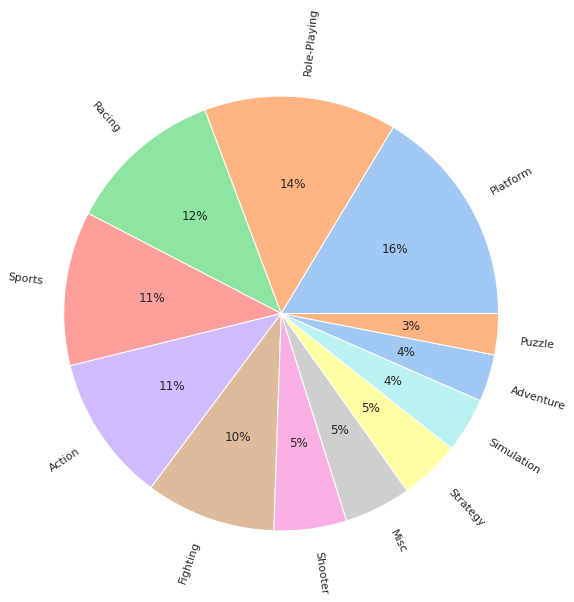

In [38]:
colors = sns.color_palette('pastel')

# create pie chart using matplotlib
plt.figure(figsize=(10,10)) 
plt.pie(df_b['total'], labels=df_b['Genre'], colors=colors,
        autopct='%.0f%%', rotatelabels='true')
plt.show()

### 3.2.3 Gruop C

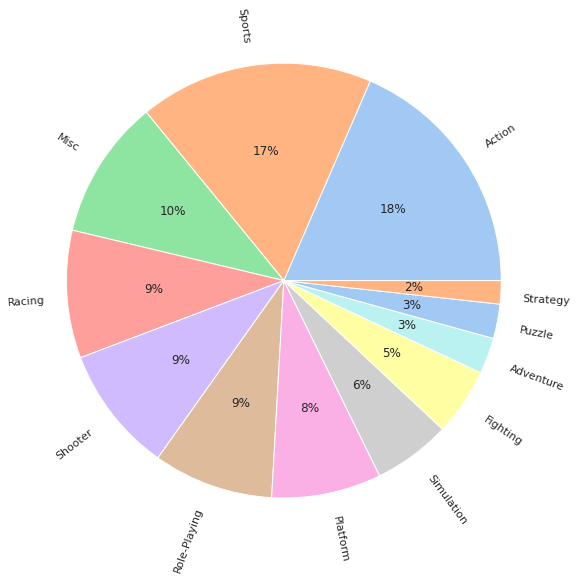

In [ ]:
colors = sns.color_palette('pastel')

# create pie chart using matplotlib
plt.figure(figsize=(10,10)) 
plt.pie(df_c['total'], labels=df_c['Genre'], colors=colors,
        autopct='%.0f%%', rotatelabels='true')
plt.show()

### 3.2.4 Gruop D

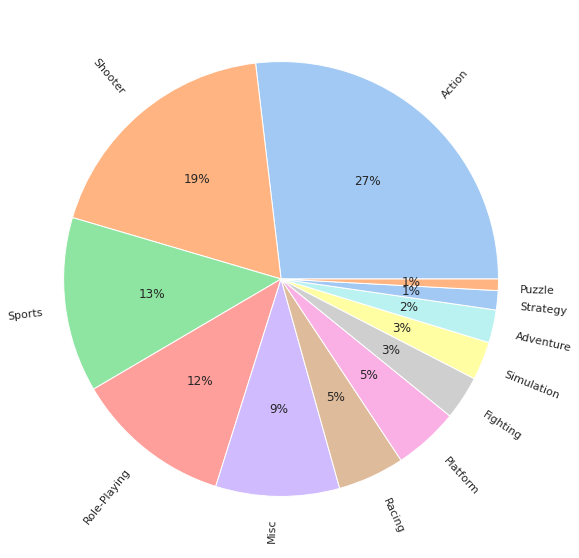

In [ ]:
colors = sns.color_palette('pastel')

# create pie chart using matplotlib
plt.figure(figsize=(10,10)) 
plt.pie(df_d['total'], labels=df_d['Genre'], colors=colors,
        autopct='%.0f%%', rotatelabels='true')
plt.show()

In [39]:
df_year = pd.concat([df4['Year'],df4['Genre'],re['total']],axis=1)
df_year
# 스케일 정규화

,Year,Genre,total
0,2008,Action,0.066667
1,2009,Action,0.381791
2,2010,Adventure,0.142465
3,2010,Misc,0.066667
4,2010,Platform,0.921102
...,...,...,...
16236,2006,Platform,0.493912
16237,2005,Action,0.016667
16238,2015,Sports,2.637940
16239,2013,Action,1.560524


## 3.3 연도별 게임장르 출고량

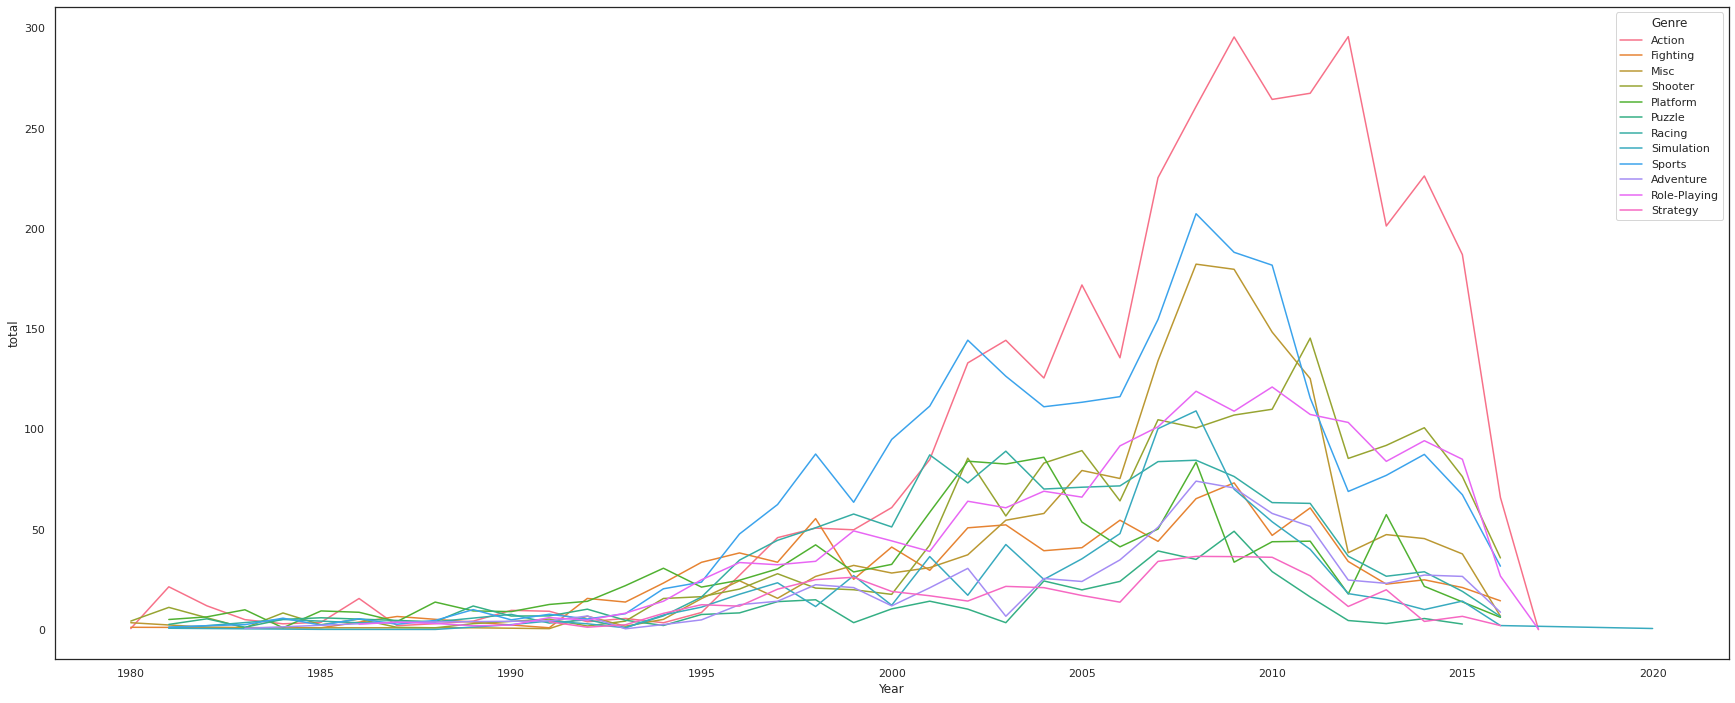

In [40]:
sns.set(rc = {'figure.figsize':(30,12)})
sns.set_style("white")
df_by_group_label2 = df_year.groupby(['Year','Genre'])['total'].sum().reset_index()
sns.lineplot(x='Year', y='total', hue='Genre',data=df_by_group_label2)
# 스케일 정규화

In [41]:
# 연도순위로 재정렬
df_sorted = df_year.sort_values(by='Year' ,ascending=True)
df_year3 = df_sorted.reset_index(drop=True)
df_year3.tail(20)

,Year,Genre,total
16221,2016,Action,2.190799
16222,2016,Sports,0.243912
16223,2016,Platform,0.512066
16224,2016,Action,0.053030
16225,2016,Role-Playing,1.047255
16226,2016,Action,0.168154
16227,2016,Strategy,0.356162
16228,2016,Fighting,0.830220
16229,2016,Action,0.036364
16230,2016,Simulation,0.142465


# 4.출고량 분석
### 4.1 제작사 출고량 탑10


In [ ]:
# 3.출고량이 높은 게임에 대한 분석 및 시각화 프로세스

In [43]:
df_new = df4

In [44]:
re5 = df4.iloc[:,[5,6,7,8]]
df_new['total'] = re5.sum(axis=1)
df_new
#스케일 ㄴㄴ

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,40.0,0.0,0.0,0.0,40.0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,170.0,0.0,0.0,10.0,180.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.0,0.0,20.0,0.0,20.0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,40.0,0.0,0.0,0.0,40.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,120.0,90.0,0.0,40.0,250.0
...,...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,150.0,40.0,0.0,10.0,200.0
16237,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,10.0,0.0,0.0,0.0,10.0
16238,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,440.0,190.0,30.0,130.0,790.0
16239,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,50.0,50.0,250.0,30.0,380.0


In [ ]:
df_new2 = df_scale2

In [45]:
df_sorted2 = df_new.sort_values(by='total' ,ascending=False)
df_new3 = df_sorted2.reset_index(drop=True)
df_new3

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total
0,Wii Sports,Wii,2006,Sports,Nintendo,41490.0,29020.0,3770.0,8460.0,82740.0
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29080.0,3580.0,6810.0,770.0,40240.0
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15850.0,12880.0,3790.0,3310.0,35830.0
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15750.0,11010.0,3280.0,2960.0,33000.0
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11270.0,8890.0,10220.0,1000.0,31380.0
...,...,...,...,...,...,...,...,...,...,...
16236,Double Sequence: The Q-Virus Invasion,DS,2008,Puzzle,Zoo Digital Publishing,10.0,0.0,0.0,0.0,10.0
16237,Command & Conquer Collection,PC,2003,Strategy,Electronic Arts,10.0,0.0,0.0,0.0,10.0
16238,Red Ninja: End of Honor,XB,2005,Action,Vivendi Games,10.0,0.0,0.0,0.0,10.0
16239,Grand Prix Legends,PC,1997,Racing,Vivendi Games,0.0,10.0,0.0,0.0,10.0


In [46]:
sample3 = df_new3.groupby('Publisher').sum()
sample3.drop(['Year'], axis=1, inplace=True)
sample4 = sample3.sort_values(by='total' ,ascending=False)
total = sample4.head(10)
total = total.reset_index()

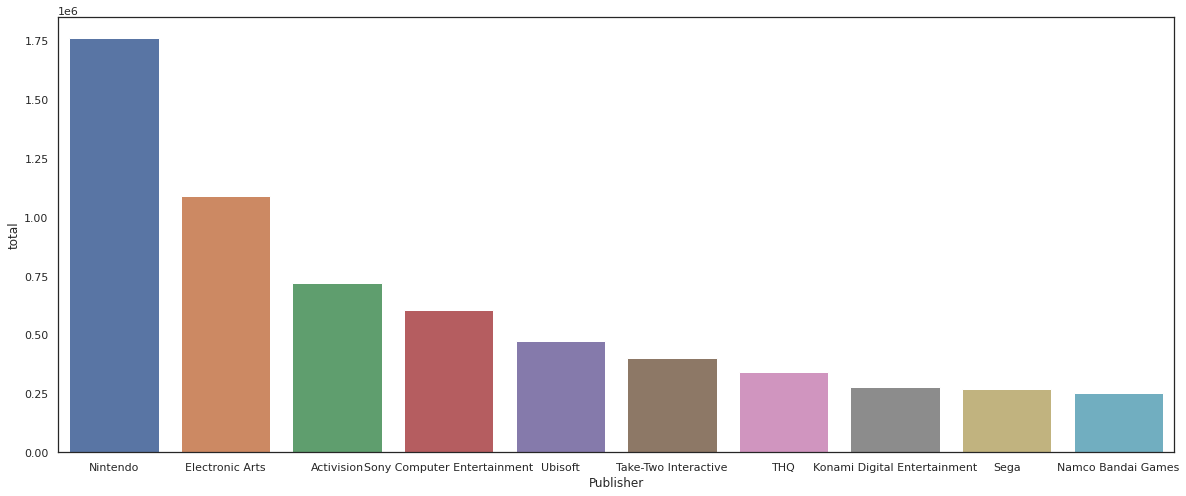

In [47]:
sns.set_style("white")
plt.figure(figsize=(20,8)) 
sns.barplot(x="Publisher", y="total", data=total)

In [51]:
#장르별 출고량
sol = df_year2[['Genre','total']]
sol2 = sol.groupby(sol['Genre']).sum()
sol2 = sol2.reset_index(inplace=False)
sol2 = sol2.sort_values(by='total' ,ascending=False)
sol3 = sol2.reset_index(drop=True)

### 4.2 출고량 탑 20게임

In [53]:
df5 = df4.sort_values(by='total' ,ascending=False)
df5 = df5.reset_index(drop=True)
df5.head(20)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total
0,Wii Sports,Wii,2006,Sports,Nintendo,41490.0,29020.0,3770.0,8460.0,82740.0
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29080.0,3580.0,6810.0,770.0,40240.0
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15850.0,12880.0,3790.0,3310.0,35830.0
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15750.0,11010.0,3280.0,2960.0,33000.0
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11270.0,8890.0,10220.0,1000.0,31380.0
5,Tetris,GB,1989,Puzzle,Nintendo,23200.0,2260.0,4220.0,580.0,30260.0
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11380.0,9230.0,6500.0,2900.0,30010.0
7,Wii Play,Wii,2006,Misc,Nintendo,14030.0,9200.0,2930.0,2850.0,29010.0
8,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14590.0,7060.0,4700.0,2260.0,28610.0
9,Duck Hunt,NES,1984,Shooter,Nintendo,26930.0,630.0,280.0,470.0,28310.0


In [61]:
test_df_wii = df5[df5['Name'].str.contains('Wii Sports')]
test_df_wii

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total
0,Wii Sports,Wii,2006,Sports,Nintendo,41490.0,29020.0,3770.0,8460.0,82740.0
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15750.0,11010.0,3280.0,2960.0,33000.0
4778,Wii Sports Club,WiiU,2014,Sports,Nintendo,190.0,140.0,40.0,30.0,400.0


In [57]:
# 닌텐도 게임
test_df_niten = df5[df5['Publisher'].str.contains('Nintendo')]
test_df_niten

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total
0,Wii Sports,Wii,2006,Sports,Nintendo,41490.0,29020.0,3770.0,8460.0,82740.0
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29080.0,3580.0,6810.0,770.0,40240.0
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15850.0,12880.0,3790.0,3310.0,35830.0
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15750.0,11010.0,3280.0,2960.0,33000.0
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11270.0,8890.0,10220.0,1000.0,31380.0
...,...,...,...,...,...,...,...,...,...,...
15760,Slide Adventure: Mag Kid,DS,2007,Action,Nintendo,0.0,0.0,10.0,0.0,10.0
15839,Nintendogs and Cats Golden Retriever and New F...,3DS,2011,Action,Nintendo,0.0,10.0,0.0,0.0,10.0
15937,Mario vs. Donkey Kong: Tipping Stars,WiiU,2015,Puzzle,Nintendo,0.0,0.0,10.0,0.0,10.0
16177,Art Academy: Home Studio,WiiU,2015,Misc,Nintendo,0.0,0.0,10.0,0.0,10.0


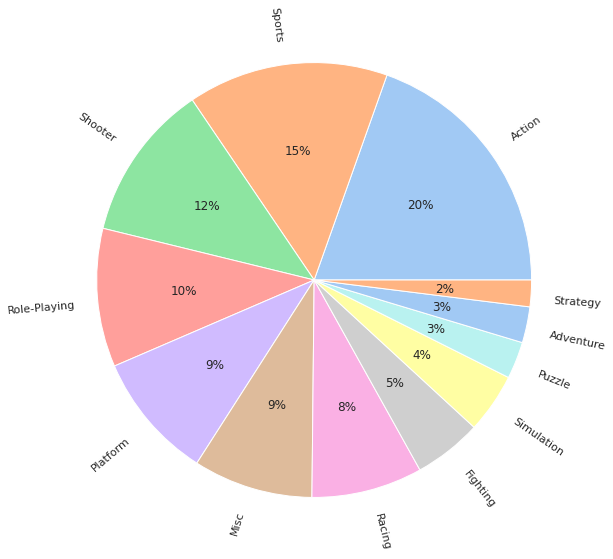

In [ ]:
labels3 = sol3['Genre'] 
frequency3 = sol3['total']

colors = sns.color_palette('pastel')

# create pie chart using matplotlib
plt.figure(figsize=(10,10)) 
plt.pie(frequency3, labels=labels3, colors=colors,
        autopct='%.0f%%', rotatelabels='true')
plt.show()

In [58]:
# 닌텐도
isin_filter = df_new3['Publisher'].isin(['Nintendo'])
df_isin = df_new3[isin_filter]
df_nin = df_isin.reset_index(drop=True)
df_nin2 = df_nin[['Genre','total']]
df_nin2

,Genre,total
0,Sports,82740.0
1,Platform,40240.0
2,Racing,35830.0
3,Sports,33000.0
4,Role-Playing,31380.0
...,...,...
687,Action,10.0
688,Action,10.0
689,Puzzle,10.0
690,Misc,10.0


In [59]:
nin_sum = df_nin2.groupby(df_nin2['Genre']).sum()
nin2 = nin_sum.reset_index(inplace=False)
nin2 = nin2.sort_values(by='total' ,ascending=False)
nin3 = nin2.reset_index(drop=True)
nin3

,Genre,total
0,Platform,426150.0
1,Role-Playing,270180.0
2,Sports,218000.0
3,Misc,172140.0
4,Racing,150230.0
5,Action,128150.0
6,Puzzle,124070.0
7,Simulation,85260.0
8,Shooter,69660.0
9,Fighting,53330.0


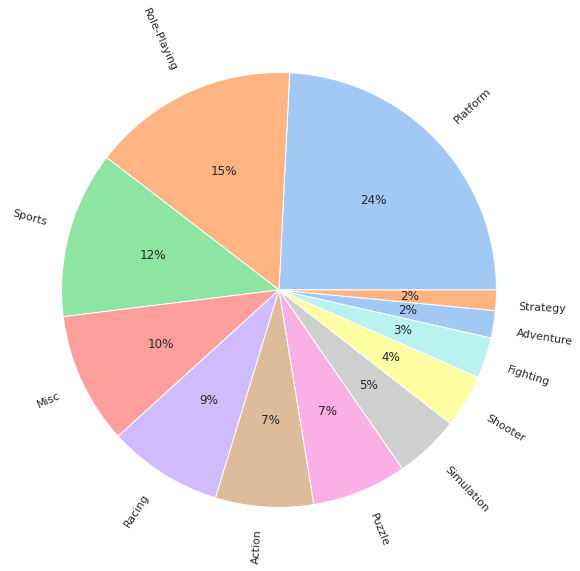

In [ ]:
#닌텐도 그래프
# Seaborn color palette to plot pie chart
labels = nin3['Genre'] 
frequency = nin3['total']
colors = sns.color_palette('pastel')

# create pie chart using matplotlib
plt.figure(figsize=(10,10)) 
plt.pie(frequency, labels=labels, colors=colors,
        autopct='%.0f%%', rotatelabels='true')
plt.show()

In [ ]:
# 소니
isin_filter = df_new3['Publisher'].isin(['Sony Computer Entertainment'])
df_isin3 = df_new3[isin_filter]
df_son = df_isin3.reset_index(drop=True)
df_son = df_son[['Genre','total']]

son_sum = df_son.groupby(df_nin2['Genre']).sum()
son2 = son_sum.reset_index(inplace=False)
son2 = son2.sort_values(by='total' ,ascending=False)
son3 = son2.reset_index(drop=True)
son3

,Genre,total
0,Platform,145870.0
1,Role-Playing,94190.0
2,Misc,60400.0
3,Sports,60010.0
4,Racing,52710.0
5,Action,49050.0
6,Puzzle,44770.0
7,Simulation,29260.0
8,Shooter,22890.0
9,Fighting,20440.0


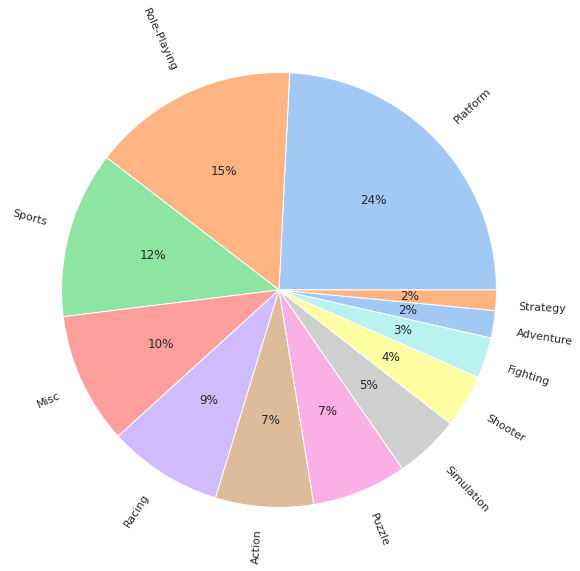

In [ ]:
#소니그래프
plt.figure(figsize=(10,10)) 
plt.pie(nin3['total'], labels=nin3['Genre'], colors=colors,
        autopct='%.0f%%', rotatelabels='true')
plt.show()

# 5.설계 방향
### 5.1 조사 및 분석의 종합

In [62]:
df_action = df_new3
df_action

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total
0,Wii Sports,Wii,2006,Sports,Nintendo,41490.0,29020.0,3770.0,8460.0,82740.0
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29080.0,3580.0,6810.0,770.0,40240.0
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15850.0,12880.0,3790.0,3310.0,35830.0
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15750.0,11010.0,3280.0,2960.0,33000.0
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11270.0,8890.0,10220.0,1000.0,31380.0
...,...,...,...,...,...,...,...,...,...,...
16236,Double Sequence: The Q-Virus Invasion,DS,2008,Puzzle,Zoo Digital Publishing,10.0,0.0,0.0,0.0,10.0
16237,Command & Conquer Collection,PC,2003,Strategy,Electronic Arts,10.0,0.0,0.0,0.0,10.0
16238,Red Ninja: End of Honor,XB,2005,Action,Vivendi Games,10.0,0.0,0.0,0.0,10.0
16239,Grand Prix Legends,PC,1997,Racing,Vivendi Games,0.0,10.0,0.0,0.0,10.0


In [ ]:
#액션 장르만 추출
isin_act = df_action['Genre'].isin(['Action'])
df_action = df_action[isin_act]
df_action = df_action[['Name','Year','Genre','Publisher','total']]
df_action

,Name,Year,Genre,Publisher,total
16,Grand Theft Auto V,2013,Action,Take-Two Interactive,21390.0
17,Grand Theft Auto: San Andreas,2004,Action,Take-Two Interactive,20810.0
23,Grand Theft Auto V,2013,Action,Take-Two Interactive,16380.0
24,Grand Theft Auto: Vice City,2002,Action,Take-Two Interactive,16150.0
37,Grand Theft Auto III,2001,Action,Take-Two Interactive,13100.0
...,...,...,...,...,...
16196,SoulCalibur Legends (JP sales),2007,Action,Namco Bandai Games,10.0
16199,Games Explosion!,2006,Action,THQ,10.0
16203,Teenage Mutant Ninja Turtles Double Pack,2006,Action,Konami Digital Entertainment,10.0
16234,Dead Rising,2016,Action,Capcom,10.0


In [ ]:
act = (df_action.Year >= 2000)
df_act2 = df_action[act]
df_act3 = df_act2[['Publisher','total']]
df_act3

,Publisher,total
16,Take-Two Interactive,21390.0
17,Take-Two Interactive,20810.0
23,Take-Two Interactive,16380.0
24,Take-Two Interactive,16150.0
37,Take-Two Interactive,13100.0
...,...,...
16196,Namco Bandai Games,10.0
16199,THQ,10.0
16203,Konami Digital Entertainment,10.0
16234,Capcom,10.0


In [ ]:
act_sum = df_act3.groupby(df_act3['Publisher']).sum()
act2 = act_sum.reset_index(inplace=False)
act2 = act2.sort_values(by='total' ,ascending=False)
act3 = act2.reset_index(drop=True)
act3 = act3.head(10)

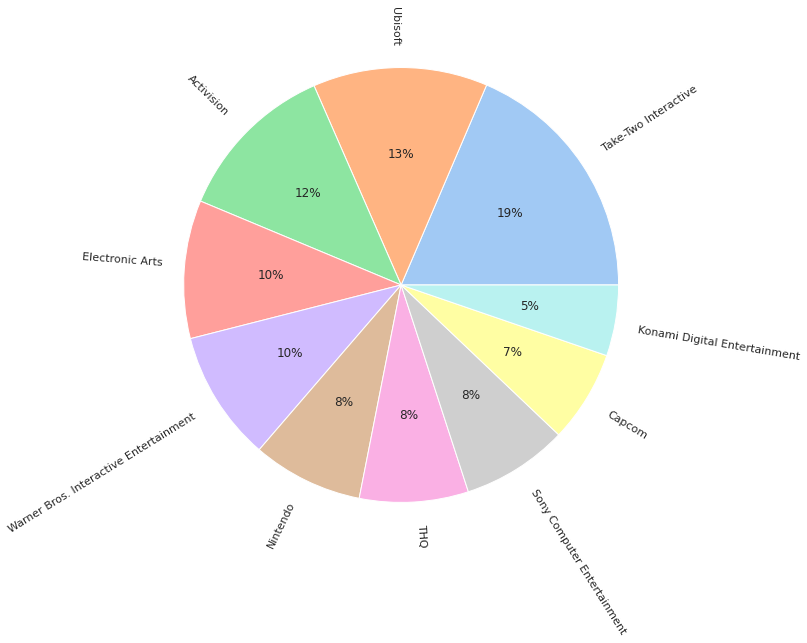

In [ ]:
colors = sns.color_palette('pastel')

# create pie chart using matplotlib
plt.figure(figsize=(10,10)) 
plt.pie(act3['total'], labels=act3['Publisher'], colors=colors,
        autopct='%.0f%%', rotatelabels='true')
plt.show()